In [1]:
import tensorflow

In [2]:
import keras

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('UNSW_NB15_training-setbroadclass.csv')

In [5]:
df = df.sample(n=80000, replace=True)

In [6]:
df.to_csv("D://faranResearch/M5/M5-SampleDS.csv")

In [6]:
dfCount=df.attack_cat.value_counts()

In [7]:
dfCount

Normal         35855
Penetration    31083
Scanning        9092
Seizure         3970
Name: attack_cat, dtype: int64

In [40]:
dfCount.to_csv("D://faranResearch/M5/M5-dfCount.csv")

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
# check for cardinality in categorical variables
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

There are 4 categorical variables

The categorical variables are : ['proto', 'service', 'state', 'attack_cat']
proto  contains  131  labels
service  contains  13  labels
state  contains  6  labels
attack_cat  contains  4  labels


In [9]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')
df['attack_cat'] = df['attack_cat'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [11]:
X = df.iloc[:, :-2]
Y=df['attack_cat']

In [12]:
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
65151,65152,0.000015,117,2,4,2,0,114,0,66666.668350,...,7,7,3,7,0,0,0,7,7,0
32922,32923,0.004976,111,5,3,8,10,1040,824,3416.398596,...,7,1,1,1,0,0,1,6,4,0
73543,73544,1.848528,111,0,3,12,10,1490,860,11.360390,...,1,1,1,2,0,0,0,1,1,0
52697,52698,0.000011,117,2,4,2,0,114,0,90909.090200,...,7,7,4,7,0,0,0,7,18,0
68212,68213,31.955507,111,0,3,20,12,1068,536,0.970099,...,2,2,2,2,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,0.000009,95,0,4,2,0,104,0,111111.107200,...,2,1,1,2,0,0,0,1,1,0
80039,80040,0.675271,111,5,3,10,8,828,1124,25.175079,...,1,1,1,4,0,0,1,1,4,0
78031,78032,0.772133,111,0,3,10,6,560,268,19.426705,...,2,2,1,6,0,0,0,2,6,0
24876,24877,5.846004,111,5,3,364,740,19410,1078890,188.675888,...,1,1,1,1,0,0,1,2,4,0


In [13]:
Y

65151    1
32922    0
73543    0
52697    1
68212    0
        ..
1404     3
80039    0
78031    0
24876    0
52039    1
Name: attack_cat, Length: 80000, dtype: int8

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Fit the model to your data
extra_trees.fit(X, Y)

# Print feature importances
feature_importances = extra_trees.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
id: 0.2175711019127697
dur: 0.009852355118270614
proto: 0.010934861727660655
service: 0.0542304123079584
state: 0.024708048809275743
spkts: 0.005383760203474416
dpkts: 0.006652044441915638
sbytes: 0.01895189811996537
dbytes: 0.0066616790132635675
rate: 0.021957621234889434
sttl: 0.07765987275310648
dttl: 0.043435989866926906
sload: 0.012959331906286124
dload: 0.016677439462202123
sloss: 0.005191427352363267
dloss: 0.006760143374459343
sinpkt: 0.010737058355306549
dinpkt: 0.005968772890072136
sjit: 0.0061436973535807385
djit: 0.005034674374058736
swin: 0.04279180964092039
stcpb: 0.01027106440788269
dtcpb: 0.008821551649822021
dwin: 0.02617141218376767
tcprtt: 0.008899932991253657
synack: 0.009577694686968405
ackdat: 0.006714345651470893
smean: 0.028033053371432366
dmean: 0.017762537400571054
trans_depth: 0.007591061591603111
response_body_len: 0.001831147349048836
ct_srv_src: 0.027855693264784324
ct_state_ttl: 0.04232954405798292
ct_dst_ltm: 0.015874960445626467
ct_

In [15]:
# Print feature importances in sorted order
feature_importances = extra_trees.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

print("Feature Importances (Sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

Feature Importances (Sorted):
id: 0.2175711019127697
sttl: 0.07765987275310648
service: 0.0542304123079584
ct_dst_sport_ltm: 0.050782189115585845
ct_dst_src_ltm: 0.05038250928615038
dttl: 0.043435989866926906
swin: 0.04279180964092039
ct_state_ttl: 0.04232954405798292
ct_srv_dst: 0.0371527304188428
smean: 0.028033053371432366
ct_srv_src: 0.027855693264784324
dwin: 0.02617141218376767
state: 0.024708048809275743
rate: 0.021957621234889434
sbytes: 0.01895189811996537
dmean: 0.017762537400571054
ct_src_dport_ltm: 0.017042541666026836
dload: 0.016677439462202123
ct_dst_ltm: 0.015874960445626467
ct_src_ltm: 0.014487658772867212
sload: 0.012959331906286124
proto: 0.010934861727660655
sinpkt: 0.010737058355306549
stcpb: 0.01027106440788269
dur: 0.009852355118270614
synack: 0.009577694686968405
tcprtt: 0.008899932991253657
dtcpb: 0.008821551649822021
trans_depth: 0.007591061591603111
dloss: 0.006760143374459343
ackdat: 0.006714345651470893
dbytes: 0.0066616790132635675
dpkts: 0.006652044441915

In [16]:
# Define importance threshold
threshold = 0.021

# Print selected features with importance >= threshold
print("Selected Features with Importance >= 0.021:")
for feature, importance in zip(X.columns, extra_trees.feature_importances_):
    if importance >= threshold:
        print(f"{feature}: {importance}")

Selected Features with Importance >= 0.021:
id: 0.2175711019127697
service: 0.0542304123079584
state: 0.024708048809275743
rate: 0.021957621234889434
sttl: 0.07765987275310648
dttl: 0.043435989866926906
swin: 0.04279180964092039
dwin: 0.02617141218376767
smean: 0.028033053371432366
ct_srv_src: 0.027855693264784324
ct_state_ttl: 0.04232954405798292
ct_dst_sport_ltm: 0.050782189115585845
ct_dst_src_ltm: 0.05038250928615038
ct_srv_dst: 0.0371527304188428


In [17]:
threshold = 0.021

# Select features with importance >= threshold
selected_features = []
for index, importance in enumerate(extra_trees.feature_importances_):
    if importance >= threshold:
        selected_features.append(X.columns[index])

# Filter X based on selected features
X = X[selected_features]

# Now you can use X_selected for further processing
print("Selected Features:", selected_features)
print("Shape of X_selected:", X.shape)

Selected Features: ['id', 'service', 'state', 'rate', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Shape of X_selected: (80000, 14)


In [18]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
df_rescaled = pd.DataFrame(data=rescaleX)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaleX, Y, test_size=0.3, random_state=10)

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [22]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

from keras.models import Sequential

In [24]:
#Model 1 for all features
#Initialising the Artificial Neural Network
model = Sequential()
#Creating the Input-layer and the first hidden layer
model.add(Dense(400, input_dim=14, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
#Creating the output  layer
model.add(Dense(4, activation='softmax'))
#Compiling the ANN classifier
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelhistory=model.fit(X_train, y_train,validation_split=0.33, batch_size=50, epochs=100)

Epoch 1/100
751/751 [==============================] - 29s 35ms/step - loss: 0.3446 - accuracy: 0.8551 - val_loss: 0.2873 - val_accuracy: 0.8750
Epoch 2/100
751/751 [==============================] - 22s 30ms/step - loss: 0.2708 - accuracy: 0.8875 - val_loss: 0.2495 - val_accuracy: 0.8899
Epoch 3/100
751/751 [==============================] - 22s 29ms/step - loss: 0.2485 - accuracy: 0.8939 - val_loss: 0.2409 - val_accuracy: 0.8980
Epoch 4/100
751/751 [==============================] - 21s 28ms/step - loss: 0.2385 - accuracy: 0.8978 - val_loss: 0.2497 - val_accuracy: 0.8925
Epoch 5/100
751/751 [==============================] - 21s 28ms/step - loss: 0.2343 - accuracy: 0.8982 - val_loss: 0.2330 - val_accuracy: 0.9009
Epoch 6/100
751/751 [==============================] - 22s 29ms/step - loss: 0.2313 - accuracy: 0.9010 - val_loss: 0.2274 - val_accuracy: 0.9005
Epoch 7/100
751/751 [==============================] - 22s 29ms/step - loss: 0.2247 - accuracy: 0.9034 - val_loss: 0.2295 - val_ac

In [22]:
y_test

35625    0
11179    1
38543    0
73760    0
60312    1
        ..
41225    0
24121    0
29418    0
61367    1
37305    0
Name: attack_cat, Length: 24000, dtype: int8

In [23]:
y_testCat = to_categorical(y_test)
y_pred = model.predict(X_test)
model.evaluate(X_test,y_testCat)

750/750 [==============================] - 14s 18ms/step - loss: 0.2255 - accuracy: 0.9156


[0.2254938930273056, 0.9156249761581421]

In [65]:
for p in predictions:
    print (p)

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1.5812057e-01 4.9040413e-01 3.9935691e-04 3.5107592e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.09609038e-14 9.98347521e-01 1.53648003e-03 1.16001116e-04]
[0. 1. 0. 0.]
[4.7724196e-05 7.7296579e-01 2.6718649e-04 2.2671923e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[7.0220963e-08 8.5551310e-01 2.4264120e-05 1.4446254e-01]
[2.3447182e-03 8.2520944e-01 2.9418655e-04 1.7215158e-01]
[3.7143521e-29 9.9999750e-01 2.4686735e-06 1.5150599e-10]
[5.0358325e-05 4.6886870e-01 1.2127816e-01 4.0980276e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.7038353e-36]
[4.477517e-06 8.405367e-04 9.990702e-01 8.476289e-05]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.6003063e-24]
[1. 0. 0. 0.]
[2.1950038e-06 8.5814011e-01 3.1696996e-04 1.4154066e-01]
[1. 0. 0. 0.]
[6.8270841e-05 8.0092055e-01 3.4658713e-04 1.9866461e-01]
[7.8327822e-08 2.3689517e-03 9.9760997e-01 2.0897043e-05]
[1. 0. 0. 0.]
[0. 1. 0

[1. 0. 0. 0.]
[1.2382279e-04 4.1996139e-01 4.4179863e-01 1.3811617e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.7543264e-06 9.8118103e-01 2.8751225e-05 1.8782502e-02]
[1.0000000e+00 0.0000000e+00 1.5991179e-37 0.0000000e+00]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.6719623e-32]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.0154202e-33]
[2.5070565e-06 9.3717527e-01 3.5796715e-05 6.2786445e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 0.0000000e+00 4.4356172e-36 3.4573044e-24]
[7.6589424e-10 2.2153214e-04 9.8830611e-01 1.1472387e-02]
[6.4820438e-10 6.8371296e-01 4.3920051e-02 2.7236700e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[4.0223159e-07 9.0606540e-01 1.6552459e-04 9.3768731e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.5248191e-05 4.8593408e-01 1.0493901e-01 4.0909168e-01]
[1. 0. 0. 0.]
[0.00063528 0.5386433  0.28041038 0.18031102]
[1.5914940e-05 5.8218825e-01 2.5299886e-01 1.6479702e-01]
[1. 0. 0. 0.]
[2.6201353e-05 1.9176586e-01 8.0761832e-01 5.896

[1. 0. 0. 0.]
[5.0632815e-10 4.6665453e-05 9.9995327e-01 3.3087364e-08]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[3.0116664e-06 9.5622665e-01 1.1059039e-05 4.3759346e-02]
[1. 0. 0. 0.]
[3.7586717e-05 6.5169060e-01 2.7289474e-01 7.5377144e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[6.3194595e-11 4.5205051e-10 1.0000000e+00 2.3622691e-08]
[8.9099276e-06 4.3642309e-01 8.6765558e-02 4.7680247e-01]
[1.0000000e+00 1.0875386e-20 4.2291912e-19 1.5374124e-20]
[0. 1. 0. 0.]
[1.0671744e-06 3.9901782e-02 9.6002531e-01 7.1914365e-05]
[1. 0. 0. 0.]
[2.5158341e-04 5.6118000e-01 2.9129338e-01 1.4727513e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 3.984385e-27]
[9.9999690e-01 8.5137350e-07 1.9582590e-06 2.9952417e-07]
[1.0000000e+00 1.0826448e-22 3.1366414e-18 1.9409173e-18]
[1. 0. 0. 0.]
[1.7165781e-05 5.4945070e-01 2.3894940e-01 2.1158282e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.8495951e-05 9.2155617e-01 9.0103276e-05 7.8325167e-02]
[1. 0. 0. 0.]
[1.6486594e-09 4.4128395e-04 9.8490912e-01 1.4649618e-02]
[9.5139490

[3.9459913e-08 9.9788195e-01 3.1508229e-08 2.1179393e-03]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.01006495e-04 5.49507022e-01 4.04858857e-01 4.55330685e-02]
[0.000000e+00 1.000000e+00 0.000000e+00 6.937225e-36]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.6003915e-24]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.00000e+00 1.00000e+00 0.00000e+00 5.29566e-33]
[9.2751284e-10 2.6065228e-04 9.8765695e-01 1.2082378e-02]
[1.9761549e-06 5.9206796e-01 5.2900463e-02 3.5502949e-01]
[1.3677618e-05 7.1437490e-01 2.2161394e-01 6.3997485e-02]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 6.0398615e-24]
[3.1212410e-05 7.7630484e-01 2.2364411e-04 2.2344027e-01]
[0. 1. 0. 0.]
[1.0000000e+00 5.6034490e-35 7.6505270e-23 3.4838132e-29]
[1.08665965e-10 2.83801393e-03 9.97155309e-01 6.69407564e-06]
[1. 0. 0. 0.]
[1.2089310e-05 5.3073354e-06 9.9998260e-01 8.5245402e-09]
[4.4321213e-09 1.7334208e-03 9.6879971e-01 2.9466918e-02]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.3696284e-35]
[1. 0. 0. 0.]
[9.9999821e-01 1.26078

[1.0000000e+00 1.5315860e-15 1.3016932e-08 1.5170260e-15]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.9194429e-36]
[3.4809458e-28 1.0000000e+00 4.3260552e-24 2.6971655e-14]
[1. 0. 0. 0.]
[7.5311332e-06 1.7292185e-01 4.1942886e-01 4.0764177e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.8703945e-04 8.6619276e-01 8.0808750e-05 1.3353945e-01]
[1. 0. 0. 0.]
[1.000000e+00 8.967371e-29 3.230395e-21 1.225618e-23]
[9.9999964e-01 1.8806508e-08 3.1574206e-07 1.9303925e-09]
[1.0000000e+00 4.5893239e-27 9.4323398e-23 5.2461095e-21]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.1713832e-29]
[1.0000000e+00 3.2163313e-19 5.5651433e-14 3.5820204e-18]
[3.71266106e-05 4.39272732e-01 1.17117494e-01 4.43572581e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.4722321e-03 8.2586139e-01 7.7833975e-04 1.6788793e-01]
[1.0000000e+00 1.0321674e-32 3.3111260e-23 1.8269917e-26]
[1. 0. 0. 0.]
[9.9916410e-01 7.5993582e-04 2.6979151e-06 7.3211326e-05]
[1.2226703e-05 4.6274844e-01 6.7373842e-02 4.698

[0.000000e+00 1.000000e+00 0.000000e+00 7.743637e-22]
[0.0000000e+00 1.0000000e+00 1.6427952e-37 7.1326436e-18]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.8131937e-18 9.9999988e-01 2.2791743e-17 1.5803880e-07]
[2.1429923e-05 9.1830254e-01 1.6116157e-04 8.1514947e-02]
[6.2915080e-34 1.0000000e+00 4.7156921e-30 6.0613974e-16]
[1.0000000e+00 1.6631118e-14 4.5698936e-10 8.9878503e-14]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[4.9427068e-05 4.4340551e-01 1.1203024e-01 4.4451481e-01]
[6.0069247e-08 9.8193824e-01 1.8449040e-06 1.8059857e-02]
[1. 0. 0. 0.]
[1.4745139e-23 1.0000000e+00 2.3417571e-17 2.4916991e-13]
[0. 1. 0. 0.]
[1.0000000e+00 3.5526048e-15 7.6899160e-14 2.5963853e-12]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.9007328e-05 5.7390273e-01 2.5326931e-01 1.7280895e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.000000e+00 1.646552e-16 3.116261e-13 1.163204e-19]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 8.9347

[1.0000000e+00 4.2964926e-13 4.4154149e-11 8.6088567e-12]
[2.2244705e-14 1.0898132e-07 9.9999988e-01 5.0342950e-12]
[4.9166221e-05 3.9477888e-01 6.0429662e-01 8.7524613e-04]
[0.05120631 0.48795816 0.08883243 0.3720031 ]
[1. 0. 0. 0.]
[9.2890147e-08 9.4816756e-01 2.1049559e-06 5.1830336e-02]
[4.0373052e-06 4.3301913e-01 8.2981504e-02 4.8399526e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.0923243e-27]
[1. 0. 0. 0.]
[4.8784917e-05 2.8723188e-02 9.6612573e-01 5.1022721e-03]
[1. 0. 0. 0.]
[1.0000000e+00 4.4925915e-38 1.4258014e-27 2.1479369e-29]
[0. 1. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 5.350381e-19]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.4648170e-05 4.4168830e-01 1.0591695e-01 4.5237020e-01]
[1.7150695e-06 7.2731864e-01 9.6539021e-05 2.7258313e-01]
[1.7722796e-05 9.4356275e-01 1.0538356e-04 5.6314204e-02]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.6928653e-11 4.3770502e-16 1.0000000e+00 5.3563680e-14]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[3.0426114e-05 4.3289039e-01 1.1907924e-01 4.4799989e-01]
[0.00129209 0.5837016  0.4109405  0.00406583]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 1.4528188e-28 1.1405238e-25 5.4418661e-23]
[1.0000000e+00 9.2789448e-17 1.7028281e-17 2.7799193e-13]
[2.0019028e-04 4.4331196e-01 1.3624273e-01 4.2024508e-01]
[1.4812007e-06 3.8046154e-01 4.6715567e-01 1.5238129e-01]
[5.83308383e-06 7.33452439e-02 9.26546454e-01 1.02384016e-04]
[2.8434330e-05 6.0937059e-01 2.4964802e-01 1.4095291e-01]
[3.7910991e-07 8.2076335e-01 4.6485152e-02 1.3275105e-01]
[2.5844010e-05 9.2921889e-01 2.6146108e-05 7.0729159e-02]
[3.6112992e-12 9.9926490e-01 3.3739275e-06 7.3172821e-04]
[1.1240592e-05 9.5945522e-03 9.9029970e-01 9.4544805e-05]
[1.0000000e+00 3.0418834e-14 2.5148617e-16 2.8357858e-10]
[0. 1. 0. 0.]
[1.7769840e-05 3.0280737e-04 9.9967909e-01 3.3289294e-07]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0960316e-04 4.8509747e-01 1.2916969e-01 3.8562328e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.

[2.9967806e-24 9.9998605e-01 7.9700864e-17 1.3912238e-05]
[1.4209618e-08 9.8235141e-08 9.9616468e-01 3.8351929e-03]
[1.9028012e-05 5.4147542e-01 7.9121999e-02 3.7938353e-01]
[0. 1. 0. 0.]
[0.02398619 0.6845574  0.04016599 0.2512904 ]
[1. 0. 0. 0.]
[1.2869675e-05 4.3962035e-01 1.0571164e-01 4.5465511e-01]
[1.00000000e+00 6.06641820e-12 1.23825465e-08 4.19892636e-13]
[1.7491676e-04 4.3692780e-01 1.3254659e-01 4.3035075e-01]
[0. 1. 0. 0.]
[8.9766053e-38 1.0000000e+00 0.0000000e+00 3.9232284e-11]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4084181e-32]
[1. 0. 0. 0.]
[1.7868422e-21 9.9998581e-01 1.4095141e-05 1.6687866e-07]
[1. 0. 0. 0.]
[1.09249335e-07 8.14252377e-01 1.24284226e-04 1.85623169e-01]
[6.7890523e-06 5.6169307e-01 2.3137879e-01 2.0692138e-01]
[4.95074892e-06 7.42566764e-01 1.38491169e-01 1.18937135e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.2267673e-07 9.7436136e-01 2.8325314e-05 2.5609992e-02]
[1.0000000e+00 4.4967248e-30 0.0000000e+00 9.7426306e-32]
[0.0000000e+00 1.0000000e+00 0.0

[1.0000000e+00 0.0000000e+00 1.2926811e-36 7.8499519e-25]
[0. 1. 0. 0.]
[1.1243833e-06 9.1926295e-01 2.0244775e-02 6.0491130e-02]
[1. 0. 0. 0.]
[9.9999559e-01 4.3853429e-06 6.8435035e-10 2.5452795e-10]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[8.6145610e-06 4.6046489e-01 7.2007671e-02 4.6751884e-01]
[0.00484195 0.43560043 0.08057212 0.47898543]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.2867340e-04 4.8991597e-01 5.0940490e-01 3.5046710e-04]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0162365e-05 5.9640169e-01 2.4885941e-01 1.5472880e-01]
[6.1152350e-05 7.6839888e-01 3.2269297e-04 2.3121737e-01]
[1. 0. 0. 0.]
[1.0000000e+00 4.1634478e-12 2.4151497e-08 3.6377878e-12]
[1. 0. 0. 0.]
[2.1325528e-05 4.3653968e-01 1.0374134e-01 4.5969760e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[5.4156194e-06 4.3091765e-01 9.0886332e-02 4.7819054e-01]
[1. 0. 0. 0.]
[5.4908651e-09 9.7540307e-01 2.2934116e-06 2.4594620e-02]
[5.8200809e-09 9.8237175e-01 1.2137300e-06 1.7627053e-02]
[0. 1.

[1.0882177e-03 2.9200640e-07 9.9891102e-01 3.8793101e-07]
[1.6840362e-05 5.4913682e-01 2.3917730e-01 2.1166906e-01]
[1.00000000e+00 9.99376038e-13 1.08755846e-14 5.27610489e-09]
[2.3173021e-05 4.7117504e-01 1.0413937e-01 4.2466247e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[7.9833798e-04 8.1994057e-02 8.9020836e-01 2.6999166e-02]
[1. 0. 0. 0.]
[1.0000000e+00 2.2352875e-17 1.9325127e-15 5.4817457e-15]
[1. 0. 0. 0.]
[2.7394135e-05 5.0698352e-01 2.7023867e-01 2.2275037e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 4.944477e-21]
[1.0000000e+00 1.7855176e-22 2.4498127e-22 3.9254510e-15]
[5.3780809e-06 4.3098593e-01 9.0692081e-02 4.7831663e-01]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 9.1673955e-21]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.5914940e-05 5.8218825e-01 2.5299886e-01 1.6479702e-01]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.1289253e-36]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.8427426e-30]
[0. 1. 0. 0.]
[0. 1.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.1983661e-12 9.9999893e-01 4.8789855e-07 6.1683090e-07]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.9999917e-01 4.7015891e-07 5.7142011e-09 3.1553662e-07]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[8.6639457e-06 4.3220109e-01 9.0800770e-02 4.7698948e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 8.754133e-21]
[4.9109635e-04 2.5431002e-03 9.9639446e-01 5.7131937e-04]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.4141880e-03 5.4120005e-06 9.9858034e-01 2.0960870e-08]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.6109460e-06 9.9918860e-01 1.5883825e-07 8.0961367e-04]
[1. 0. 0. 0.]
[1.9029931e-05 1.8599114e-01 6.5665507e-01 1.5733483e-01]
[9.7949094e-05 6.0422438e-01 2.8439647e-01 1.1128121e-01]
[0. 1. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.6737774e-33]
[1. 0. 0. 0.]
[1.0000000e+00 4.1677847e-20 4.8780744e-16 5.5397599e-17]
[0. 1. 0. 0.]
[3.771713e-07 9.919436e-01 2.489339e-07 8.055812e-03]
[1.8604643e-04 4.3655127e-01 1.3

[1. 0. 0. 0.]
[1.0000000e+00 3.1294360e-17 6.4288496e-12 2.7975890e-17]
[1. 0. 0. 0.]
[3.2269850e-04 5.5160636e-01 3.1580132e-01 1.3226961e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[8.7128001e-06 9.7177231e-01 1.4046152e-03 2.6814392e-02]
[0.00047558 0.4237124  0.11671124 0.4591007 ]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 1.9002308e-30 1.4946227e-24 2.1050908e-29]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.4130919e-05 1.1993112e-02 9.8576051e-01 2.2222600e-03]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[7.4999057e-06 8.0957520e-01 1.2195575e-03 1.8919781e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.8068040e-05 9.3966907e-01 1.2682084e-05 6.0300134e-02]
[6.5068038e-05 5.9247106e-01 2.7246106e-01 1.3500275e-01]
[1. 0. 0. 0.]
[1.3253045e-08 9.5159632e-01 2.5920928e-02 2.2482723e-02]
[0. 1. 0. 0.]
[2.4261026e-04 7.4698269e-01 2.4463321e-01 8.1415335e-03]
[6.8907058e-05 4.2860189e-01 1.2087302e-01 4.5045614e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.7806368e-06 5.6168312e-01 2.31352

[1.0504861e-07 9.5970911e-01 1.9522789e-05 4.0271245e-02]
[0. 1. 0. 0.]
[3.4684647e-10 9.8952466e-01 1.0433846e-02 4.1565909e-05]
[1.0000000e+00 2.0174899e-31 4.3064946e-24 5.6484486e-29]
[0. 1. 0. 0.]
[3.5083954e-06 4.2343564e-02 9.5646757e-01 1.1853208e-03]
[2.4348174e-06 8.8921762e-01 7.8826211e-02 3.1953797e-02]
[0.000000e+00 1.000000e+00 0.000000e+00 1.688345e-18]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.8552955e-05 3.8896725e-02 9.5624244e-01 4.8323264e-03]
[1. 0. 0. 0.]
[3.0696679e-08 8.7087148e-01 1.0034506e-01 2.8783413e-02]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.8950525e-36]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[4.3729065e-06 4.3228659e-01 8.4548429e-02 4.8316064e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 7.227227e-23]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[9.3455375e-11 1.3723455e-03 9.9862695e-01 6.9824910e-07]
[1.9680552e-10 9.9998796e-01 8.0418858e-06 4.0450063e-06]
[1.07026035e-05 4.35514569e-01 9.32302698e-02 4.71244365e-01]
[1. 0. 0. 0.]
[5.0358325e-05 4.6886870e-01 1.2127816

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.9474751e-05 5.5295306e-01 2.5963128e-01 1.8737619e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.8977469e-07 9.4116402e-01 7.1252749e-04 5.8122836e-02]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 7.032294e-28]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[2.2357608e-05 3.1729389e-05 9.9908257e-01 8.6333812e-04]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3662276e-38]
[6.70119071e-10 1.18756162e-14 1.00000000e+00 1.22352605e-14]
[1.9427887e-10 9.9913847e-01 2.6851263e-05 8.3471747e-04]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2977686e-31]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3822595e-29]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.7332214e-27]
[3.7459383e-06 9.7150162e-02 8.9662611e-01 6.2199584e-03]
[3.25420056e-04 5.88882387e-01 2.94772953e-01 1.16019264e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0273302e-06 7.4183208e-01 2.401

[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[4.6267178e-05 4.4274855e-01 1.1302167e-01 4.4418356e-01]
[0. 1. 0. 0.]
[3.3790730e-06 4.3591794e-01 7.8911699e-02 4.8516703e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.2859789e-08 2.8915921e-12 1.0000000e+00 1.0343325e-15]
[3.5395336e-04 1.1110731e-01 6.2034261e-01 2.6819608e-01]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.3651660e-21 3.2827434e-36]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[5.4403035e-06 8.6013037e-01 1.0673351e-01 3.3130683e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.7704252e-06 5.1370932e-04 9.7220999e-01 2.7274514e-02]
[4.0859377e-06 4.4223598e-01 7.7850565e-02 4.7990939e-01]
[1. 0. 0. 0.]
[3.0921521e-05 9.1701716e-01 2.8323234e-04 8.2668684e-02]
[1. 0. 0. 0.]
[3.4680869e-04 5.4558277e-01 2.7462304e-01 1.7944746e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.7442556e-07 5.5589866e-02 2.5695828e-01 6.8745160e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.

[1. 0. 0. 0.]
[1.0000000e+00 1.1935170e-08 1.8122549e-08 4.0708748e-08]
[0.000000e+00 1.000000e+00 0.000000e+00 9.751224e-31]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 5.222451e-20]
[1. 0. 0. 0.]
[0.01691692 0.18529214 0.7885612  0.00922966]
[0. 1. 0. 0.]
[1.0266030e-01 7.5474513e-01 2.2693424e-04 1.4236769e-01]
[5.9689528e-06 9.8361719e-01 2.2134498e-05 1.6354652e-02]
[2.8758650e-11 4.8660317e-01 2.4242485e-03 5.1097256e-01]
[1. 0. 0. 0.]
[6.3345378e-06 4.7760847e-01 1.1853679e-01 4.0384844e-01]
[6.4132364e-06 9.7293490e-01 3.1893697e-04 2.6739709e-02]
[1. 0. 0. 0.]
[1.6324592e-10 1.0312214e-02 9.8966950e-01 1.8285860e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.9403505e-05 6.3223141e-01 2.7944911e-01 8.8280126e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.01780815e-05 1.53098570e-03 9.98424292e-01 3.45557564e-05]
[0.09030443 0.7471672  0.01110154 0.15142675]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.0861189e-05 8.7696403e-01 1.6898153e-04 1.2284616e-01]
[0. 1. 0. 0.]
[1. 0.

[1. 0. 0. 0.]
[1.0000000e+00 2.0007531e-22 1.2253717e-13 2.6157868e-19]
[1. 0. 0. 0.]
[3.7228943e-07 9.5411783e-01 1.4848093e-05 4.5866866e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[6.381578e-05 7.710018e-01 6.739274e-05 2.288669e-01]
[1. 0. 0. 0.]
[1.25439750e-04 8.80808949e-01 3.30927956e-04 1.18734635e-01]
[0. 1. 0. 0.]
[4.0200865e-04 8.3288127e-01 5.9081306e-04 1.6612598e-01]
[1. 0. 0. 0.]
[1.0000000e+00 2.5852848e-17 2.3154626e-18 1.5020508e-12]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.3580309e-06 9.3917650e-01 4.1941959e-02 1.8880196e-02]
[1. 0. 0. 0.]
[1.5078986e-15 9.9874580e-01 6.6405075e-04 5.9013953e-04]
[0. 1. 0. 0.]
[9.8279823e-05 6.0420048e-01 2.8443259e-01 1.1126863e-01]
[1.0000000e+00 1.5855355e-15 1.3388716e-17 3.3372122e-14]
[1.1362060e-05 9.2207128e-01 4.4801336e-04 7.7469356e-02]
[1.0000000e+00 0.0000000e+00 1.3072973e-33 2.5762078e-32]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.20315404e-07 7.35682487e-01 1.56112015e-01 1.08204864e-01]
[1.000000e+00 0.00

[0. 1. 0. 0.]
[1.0000000e+00 5.0209974e-22 5.5818228e-14 6.3286918e-21]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.2045855e-05 5.7426232e-01 2.5386783e-01 1.7184784e-01]
[1.02611175e-05 5.95748186e-01 2.48804867e-01 1.55436680e-01]
[7.6544202e-06 5.9429711e-01 2.5036317e-01 1.5533203e-01]
[1.0000000e+00 1.4512332e-30 6.7972229e-25 1.5247702e-24]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[5.2010742e-05 9.9640828e-01 6.3985652e-05 3.4756544e-03]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[5.4195749e-07 9.3782991e-01 7.8158751e-05 6.2091358e-02]
[2.1674392e-04 4.3915790e-01 1.4324455e-01 4.1738081e-01]
[0. 1. 0. 0.]
[2.6565173e-04 8.2880431e-01 1.0616056e-04 1.7082390e-01]
[1. 0. 0. 0.]
[1.000000e+00 2.872548e-21 3.250814e-15 1.750906e-18]
[1. 0. 0. 0.]
[4.2230026e-06 4.5572028e-01 7.8643613e-02 4.6563187e-01]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 4.411077e-31]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.14510694e-04 4.81567979e-01 5.17044723e-01 1.27280469e-03]
[1.1812288e-05 1.42353

[6.8564361e-05 9.2056286e-01 7.4758369e-04 7.8620978e-02]
[4.6841089e-27 1.5217908e-22 1.0000000e+00 2.5427674e-25]
[1.0000000e+00 3.0006246e-36 2.4239771e-24 1.3875199e-31]
[5.3230533e-04 5.7283425e-01 1.2148628e-01 3.0514723e-01]
[0. 1. 0. 0.]
[9.9999821e-01 1.0889620e-10 1.8050400e-06 5.3603726e-11]
[3.0709608e-22 1.0000000e+00 3.8437912e-21 2.0269043e-13]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.35673645e-05 9.13667381e-01 1.83038079e-04 8.61359611e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.1727759e-05 5.0278115e-01 4.9435318e-01 2.8539700e-03]
[1. 0. 0. 0.]
[0.00000000e+00 1.00000000e+00 0.00000000e+00 1.03931675e-36]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.5145129e-05 4.1627386e-01 8.8194825e-02 4.9550620e-01]
[1. 0. 0. 0.]
[0.00246028 0.9152902  0.00153377 0.08071586]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.9388611e-32]
[3.3395391e-04 5.4626763e-01 2.7395746e-01 1.7944095e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[3.7577793e-05 6.5168810e-

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.00084002 0.5168552  0.35467884 0.12762597]
[0. 1. 0. 0.]
[2.9282219e-07 9.6759760e-01 7.0439037e-06 3.2394949e-02]
[1. 0. 0. 0.]
[1.0000000e+00 2.1546136e-17 2.5098421e-14 1.7214813e-17]
[0.05732216 0.48787293 0.15260595 0.30219898]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[4.1986993e-14 9.9999416e-01 5.6351173e-06 1.7925503e-07]
[2.5192880e-05 4.1628656e-01 8.7670766e-02 4.9601743e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.0867484e-04 5.5003834e-01 2.7378753e-01 1.7596547e-01]
[0. 1. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 6.024752e-21]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.2648870e-10 1.1518424e-06 9.9999881e-01 2.6867884e-08]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.5139917e-20 1.0000000e+00 4.2102668e-09 3.4302573e-08]
[5.7052377e-11 4.0569803e-10 1.0000000e+00 1.9286819e-09]
[9.8274231e-01 1.0722190e-02 4.6899680e-05 6.4885956e-03]
[5.25769028e-05 4.44154233e-01 1.10319436e-01 4.45473731e-01]
[1.2770877e-04 4.2795402e-01 1.3783599e-01 4.3408233e-01]
[1. 0. 0. 0.]
[0

[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 6.0534197e-33]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.4054875e-05 5.3293413e-01 4.1381752e-01 5.3184237e-02]
[0.7660118  0.07877412 0.14757288 0.00764119]
[1. 0. 0. 0.]
[1.8339474e-10 1.2980115e-08 1.0000000e+00 1.7336188e-11]
[1. 0. 0. 0.]
[8.0561867e-06 5.6476372e-01 2.4742647e-01 1.8780187e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.1015911e-08 9.9339563e-01 4.2886950e-05 6.5615652e-03]
[3.1292369e-05 9.1400498e-01 1.7402657e-04 8.5789770e-02]
[0. 1. 0. 0.]
[1.3565173e-05 6.5691400e-01 2.6928973e-01 7.3782705e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 8.4854393e-37 1.6951832e-36]
[3.5378308e-11 4.2927779e-11 1.0000000e+00 1.8031986e-10]
[1.0000000e+00 1.8140160e-37 4.6336483e-22 2.4085086e-33]
[0.00523754 0.6395727  0.14553928 0.20965052]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.3778373e-05 8.9358282e-01 1.5748572e-02 9.0644836e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 

[9.9960774e-01 4.3605052e-08 3.9211480e-04 1.1717067e-07]
[0. 1. 0. 0.]
[1.0000000e+00 3.8302501e-22 2.5272658e-25 2.5599337e-19]
[1. 0. 0. 0.]
[1.2226703e-05 4.6274844e-01 6.7373842e-02 4.6986553e-01]
[1.0000000e+00 4.0160288e-14 1.2095669e-14 1.4572751e-14]
[1. 0. 0. 0.]
[5.9807615e-04 8.2519555e-01 5.7523383e-04 1.7363121e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.000000e+00 0.000000e+00 9.284534e-33 0.000000e+00]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.3626926e-11 9.4153630e-03 9.9057126e-01 1.3372596e-05]
[1. 0. 0. 0.]
[0.01074748 0.12351315 0.74801415 0.11772516]
[1. 0. 0. 0.]
[9.9962413e-01 3.0734963e-04 5.7195781e-10 6.8446796e-05]
[1. 0. 0. 0.]
[1.2980947e-05 4.3428323e-01 9.6419863e-02 4.6928388e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 3.4950718e-38]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.1831026e-03 1.6275834e-01 8.3596444e-01 9.4105613e-05]
[1. 0. 0. 0.]
[9.9999833e-01 3.1159567e-07 5.9197384e-07 7.4793826e-07]
[1. 0. 0. 

[1.09908666e-04 5.21255493e-01 4.08466488e-01 7.01681823e-02]
[1.7094029e-05 1.5856616e-06 9.9998140e-01 5.3099383e-09]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.6439432e-31]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.4324317e-05 6.4770591e-01 2.6784006e-01 8.4439620e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.1772738e-06 4.0125400e-02 9.5057291e-01 9.2945825e-03]
[0.00053835 0.5128039  0.47890463 0.00775313]
[5.5444588e-10 3.7415293e-03 6.1728263e-01 3.7897581e-01]
[1. 0. 0. 0.]
[0.00124885 0.67133325 0.00991295 0.3175049 ]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.00385709 0.6162733  0.04178463 0.338085  ]
[9.5929622e-08 1.7712799e-01 8.2269430e-01 1.7763316e-04]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[3.3615393e-06 4.1504377e-01 5.4019141e-01 4.4761494e-02]
[1.5477567e-04 7.6834130e-01 3.8382602e-03 2.2766566e-01]
[5.5263727e-06 1.5911257e-02 9.8168474e-01 2.3985000e-03]
[6.1917752e-05 4.1973075e-01 3.8922852e-01 1.9097878e-01]
[1. 0. 0. 0.]
[1. 0. 0. 

[1.0000000e+00 1.7274612e-13 9.1150830e-11 1.1211486e-14]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.9472716e-22]
[1.4895534e-04 8.6701137e-01 5.1376115e-05 1.3278835e-01]
[1. 0. 0. 0.]
[3.5013877e-11 9.9317098e-01 6.5039912e-06 6.8224757e-03]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.9687131e-29]
[1.0000000e+00 0.0000000e+00 6.1825954e-32 1.4991520e-30]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.00000000e+00 0.00000000e+00 5.31779584e-37 1.06123135e-36]
[1. 0. 0. 0.]
[1.0000000e+00 4.5859900e-12 2.4046880e-08 6.1419324e-12]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.2117564e-04 4.4165045e-01 1.4231610e-01 4.1571230e-01]
[1. 0. 0. 0.]
[1.5954298e-06 1.0923959e-04 9.9980956e-01 7.9636076e-05]
[1.1494120e-07 6.6922194e-01 5.5837565e-05 3.3072218e-01]
[4.1035241e-06 4.4208351e-01 7.7862680e-02 4.8004973e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.1493581e-27]
[0. 1. 0. 0.]
[1.0000000e+00 8.3517309e-19 3.7954213e-19 2.6317622e-18]
[1

[9.3455375e-11 1.3723455e-03 9.9862695e-01 6.9824910e-07]
[9.5038064e-04 9.3766522e-01 2.7500410e-04 6.1109409e-02]
[4.9970098e-05 1.7508522e-01 3.5045663e-01 4.7440818e-01]
[1.7467643e-07 6.1835289e-01 2.1258575e-05 3.8162571e-01]
[1. 0. 0. 0.]
[3.2823780e-04 5.4657859e-01 2.7365789e-01 1.7943534e-01]
[2.5346068e-07 3.2667190e-06 9.9999321e-01 3.2676569e-06]
[0. 0. 1. 0.]
[1.0000000e+00 0.0000000e+00 3.2940000e-26 6.1316885e-35]
[9.9989080e-01 1.2136720e-08 1.0907087e-04 8.4933497e-08]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 1.6299238e-37 1.7314062e-17]
[1.9308893e-05 8.5635111e-03 9.9133962e-01 7.7596749e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.0355753e-05 5.3891391e-01 2.5846502e-01 2.0255071e-01]
[1.0980384e-05 9.6604776e-01 5.6402612e-05 3.3884924e-02]
[9.6791979e-09 2.6102876e-04 9.9973899e-01 2.9127925e-09]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[4.806952e-06 9.990094e-01 9.856179e-04 6.412751e-08]
[8.2409460e-06 4.4102818e-01 8.0777414e-02 4.7818619e-01]
[1.000000e+00 0.000000e+00 0.000000e

[0. 1. 0. 0.]
[1.2256849e-06 9.7114211e-01 8.3484229e-05 2.8773174e-02]
[5.7901941e-09 9.7292852e-01 1.8946251e-06 2.7069701e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.9329851e-05 4.9269620e-01 2.6131442e-01 2.4595013e-01]
[0. 1. 0. 0.]
[2.2292194e-04 1.1642829e-03 9.9853301e-01 7.9714366e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 6.9102954e-18]
[1. 0. 0. 0.]
[5.7085358e-06 5.8685040e-01 6.0869589e-02 3.5227433e-01]
[3.479470e-05 8.693964e-04 9.990953e-01 4.794616e-07]
[1. 0. 0. 0.]
[2.0479823e-05 4.7339731e-01 8.0753855e-02 4.4582841e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.1104066e-28]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.1152350e-05 7.6839888e-01 3.2269297e-04 2.3121737e-01]
[2.1718568e-05 4.1423160e-01 1.1132881e-01 4.7441790e-01]
[1. 0. 0. 0.]
[1.0610426e-06 9.4219565e-01 6.3109415e-05 5.7740178e-02]
[4.1610940e-05 4.4156247e-01 1.1492012e-01 4.4347578e-01

[0.000000e+00 1.000000e+00 0.000000e+00 4.006913e-27]
[2.0414856e-07 5.1226938e-04 9.9875164e-01 7.3586206e-04]
[2.7154698e-07 9.6080446e-01 3.8062295e-05 3.9157212e-02]
[2.2285579e-07 1.4454882e-04 9.9985218e-01 2.9516348e-06]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[4.0418203e-05 5.3794587e-01 8.7104090e-02 3.7490961e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0292816e-05 5.9553927e-01 2.4878728e-01 1.5566309e-01]
[1. 0. 0. 0.]
[1.9017878e-06 9.5819157e-01 1.3090507e-04 4.1675553e-02]
[1. 0. 0. 0.]
[4.0889422e-08 9.8031551e-01 2.4252697e-06 1.9681972e-02]
[3.5410480e-08 2.2297749e-11 9.9999964e-01 3.5829274e-07]
[4.1166189e-04 8.3191186e-01 1.2265219e-04 1.6755384e-01]
[1. 0. 0. 0.]
[1.0000000e+00 1.8983801e-26 2.9160957e-19 3.8312544e-24]
[1. 0. 0. 0.]
[5.1250759e-09 9.8251951e-01 3.0681045e-07 1.7480152e-02]
[1. 0. 0. 0.]
[2.7884951e-06 9.8988813e-01 7.3716060e-06 1.0101775e-02

[4.13900016e-05 4.41497952e-01 1.15028165e-01 4.43432510e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[5.5618106e-29 1.0000000e+00 1.3527741e-17 2.8419548e-20]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5105639e-23]
[0.0000000e+00 1.0000000e+00 2.9543582e-32 1.3670503e-17]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[4.9109635e-04 2.5431002e-03 9.9639446e-01 5.7131937e-04]
[1. 0. 0. 0.]
[6.6408567e-05 5.8288318e-01 2.7355698e-01 1.4349334e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.08860004e-04 5.50670683e-01 2.61894971e-01 1.87325448e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.07593075e-11 4.71000158e-06 9.99995232e-01 5.83899640e-09]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.3329104e-08 2.1790112e-04 9.9920279e-01 5.7925982e-04]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.3758414e-04 4.3269131e-01 4.3383414e-01 1.3333696e-01]
[1. 0. 0. 0.]
[2.2631912e-06 5.1068896e-03 9.9341351e-01 1

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.8711625e-06 6.3603300e-01 2.7054441e-01 9.3412735e-02]
[2.6003993e-04 4.3568105e-01 1.4540637e-01 4.1865259e-01]
[6.3990319e-06 8.7757391e-01 2.6803877e-05 1.2239293e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.6837565e-06 3.3126566e-05 9.9996185e-01 3.3515469e-06]
[5.9541407e-25 7.8264847e-24 1.0000000e+00 1.8771676e-16]
[4.7740326e-07 2.8123744e-03 9.9663985e-01 5.4725452e-04]
[4.8532064e-07 7.9670388e-01 1.6266103e-01 4.0634673e-02]
[0.0005826  0.51610065 0.31901425 0.16430254]
[1. 0. 0. 0.]
[9.9999905e-01 9.6112387e-07 9.6204122e-10 2.2070383e-08]
[1.0000000e+00 4.7932860e-35 1.8614143e-25 3.0949663e-28]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4705084e-31]
[1.0000000e+00 5.1433255e-36 4.1865918e-33 1.4712728e-29]
[0. 1. 0. 0.]
[2.2421436e-06 6.6160005e-01 3.0461618e-01 3.3781581e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.9105933e-05 4.6409669e-04 9.9951494e-01 1.8524382e-06]
[1. 0. 0. 0.]
[3.3312896e-04 5.4631323e-01 2.7391317e-01 1.7

[2.5544001e-05 4.4060764e-01 1.0805189e-01 4.5131490e-01]
[0.0000000e+00 1.0000000e+00 5.3795007e-35 8.7113678e-19]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.2534112e-05 4.1945472e-01 1.0618154e-01 4.7434112e-01]
[4.4589515e-06 8.6685920e-01 1.0138301e-01 3.1753328e-02]
[0. 1. 0. 0.]
[1.1349140e-04 5.2988666e-01 1.0429422e-01 3.6570555e-01]
[1.1702006e-03 8.3066791e-01 7.8987866e-04 1.6737202e-01]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.2617492e-24 8.2173535e-35]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.00122885 0.48987812 0.3661844  0.1427087 ]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 1.2641062e-34 0.0000000e+00]
[6.7381093e-06 9.6054196e-01 4.5837348e-04 3.8992930e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3621627e-24]
[1.0000000e+00 4.1540847e-36 3.6513589e-26 5.3836639e-29]
[4.1887133e-06 7.1628469e-01 9.7835407e-02 1.8587568e-01]
[1. 0. 0. 0.]
[2.4087952e-09 1.9838378e-02 9.7962999e-01 5.3162803e-04]
[1. 0. 0. 0.]
[1.7693072e-06 8.6817658e-01 1.2

[1.0000000e+00 3.2831810e-14 1.7035724e-09 3.2887589e-14]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.52455594e-06 6.32932127e-01 2.44152769e-01 1.22905605e-01]
[3.6587555e-06 9.2434555e-01 1.9236291e-05 7.5631477e-02]
[1. 0. 0. 0.]
[5.6415681e-11 3.5424521e-06 9.9999642e-01 3.4127257e-10]
[0. 1. 0. 0.]
[2.1267983e-06 9.1835731e-01 5.4076120e-02 2.7564438e-02]
[1. 0. 0. 0.]
[8.5840875e-04 8.3453327e-01 3.4616922e-04 1.6426225e-01]
[1.4941403e-05 1.5355998e-02 9.8085785e-01 3.7712490e-03]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.00084139 0.1601219  0.83514285 0.00389394]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 3.172304e-28]
[8.9888144e-06 9.2919594e-01 5.3449839e-02 1.7345266e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.00141054 0.01587178 0.6404048  0.34231284]
[0. 1. 0. 0.]
[1.4626077e-08 9.8758727e-01 3.8307688e-05 1.2374350e-02]
[0. 1. 0. 0.]
[6.9233407e-05 5.2552897e-01 8.3860859e-02 3.9054093e-01]
[2.7748469e-05 5.7

[1.7724014e-15 1.7665677e-04 8.1625187e-01 1.8357146e-01]
[7.3505785e-06 5.1704788e-01 2.2968115e-01 2.5326362e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.1412433e-30]
[1. 0. 0. 0.]
[4.0821969e-06 8.6330700e-01 9.9881656e-02 3.6807284e-02]
[2.7721571e-05 4.3593982e-01 1.1091733e-01 4.5311511e-01]
[0.0000000e+00 1.0000000e+00 9.5117713e-28 1.7957655e-20]
[2.7324539e-05 9.3452734e-01 3.4985933e-05 6.5410331e-02]
[1. 0. 0. 0.]
[9.9070203e-06 3.6343309e-01 1.5870190e-01 4.7785512e-01]
[1.1729629e-04 5.2416342e-01 4.2589656e-01 4.9822677e-02]
[7.5008938e-30 1.0000000e+00 1.1859175e-23 1.4166779e-18]
[2.42804362e-07 1.39632085e-02 9.85219240e-01 8.17284570e-04]
[4.1405184e-07 9.7369373e-01 2.8433877e-05 2.6277417e-02]
[1. 0. 0. 0.]
[2.6016316e-06 1.4244066e-02 9.8224789e-01 3.5054770e-03]
[1. 0. 0. 0.]
[5.9292060e-10 1.5118634e-04 9.9044776e-01 9.4010541e-03]
[1. 0. 0. 0.]
[2.1366739e-04 4.3888095e-01 1.2817708e-01 4.3272826e-01]
[7.0869886e-05 2.1218233e-01 6.6569436e-01 1.2205249e-01

[1.0000000e+00 2.8297455e-17 2.2870339e-14 1.4640827e-16]
[1. 0. 0. 0.]
[3.3188524e-04 7.4320590e-01 1.2312947e-04 2.5633910e-01]
[1.4096114e-04 4.3136528e-01 1.2894818e-01 4.3954560e-01]
[1. 0. 0. 0.]
[4.5445882e-05 4.7630650e-01 1.0112387e-01 4.2252421e-01]
[5.9117770e-07 9.2104912e-01 2.6485173e-04 7.8685321e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 3.729615e-34]
[0. 1. 0. 0.]
[1.4042221e-06 2.5352456e-03 9.9745446e-01 8.9058522e-06]
[1. 0. 0. 0.]
[4.9582593e-07 9.6581119e-01 2.1960460e-04 3.3968650e-02]
[9.8138598e-06 1.5372989e-03 9.9839479e-01 5.8109246e-05]
[0. 1. 0. 0.]
[3.567791e-05 8.706370e-02 9.122690e-01 6.316189e-04]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.0046657e-05 9.5536250e-01 9.0976937e-05 4.4526517e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.2935656e-15 4.6584085e-14 1.0000000e+00 8.8784802e-18]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.8821883e-22]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.6696504e-05 6

[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2650166e-21]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.0381992e-07 7.3434143e-09 9.9999976e-01 6.2899123e-11]
[0. 1. 0. 0.]
[6.9412687e-05 2.2481064e-01 7.7285022e-01 2.2697682e-03]
[1.5909033e-04 7.9921603e-01 1.3604329e-04 2.0048888e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.1463876e-30]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 1.4742382e-38 1.8621658e-19]
[1.0000000e+00 5.9836132e-22 1.2378051e-17 2.6152392e-18]
[5.5827113e-04 1.7668851e-02 9.8128372e-01 4.8920582e-04]
[1.02512399e-06 9.44466114e-01 1.52126295e-05 5.55177145e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 2.1104585e-17 1.6038006e-18 4.2861895e-12]
[2.0010649e-04 4.4329694e-01 1.3623329e-01 4.2026967e-01]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.6355518e-25]
[0.20770444 0.6290944  0.06260812 0.10059308]
[2.4103876e-05 3.7111631e-01 1.1245857e-01 5.1640099e-01]
[1.0799073e-08 9.9798763e-01 7.3658745e-04 1.2758169e-03]
[0. 1. 0. 0.

[3.4185450e-12 9.9544394e-01 4.2700660e-03 2.8596490e-04]
[1.0477943e-24 1.0000000e+00 3.9189342e-08 8.0191116e-14]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.3650778e-06 7.6517361e-01 2.3479661e-01 2.8465931e-05]
[7.5587309e-08 9.0467732e-04 9.9909484e-01 3.1768985e-07]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 1.8823760e-36 2.2015113e-27 1.3665713e-31]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.1881087e-06 7.0101567e-05 9.9990523e-01 2.3508665e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.7412416e-06 4.5643201e-01 8.6429320e-02 4.5713189e-01]
[1. 0. 0. 0.]
[6.2590558e-04 9.4226748e-01 7.7762350e-04 5.6328956e-02]
[2.0224912e-04 4.4366023e-01 1.3646905e-01 4.1966844e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 9.318079e-30]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.9117387e-05 9.0836519e-01 7.3764801e-02 1.7840935e-02]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.1177709e-05 5.7791305e-01 2.2615205e-01 1.9592376e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]


[1. 0. 0. 0.]
[0. 1. 0. 0.]
[2.9901342e-04 5.9005296e-01 2.9400873e-01 1.1563923e-01]
[1. 0. 0. 0.]
[0.29267463 0.6699548  0.01371487 0.02365571]
[1.0000000e+00 8.2946120e-19 1.5991508e-19 4.0119123e-13]
[6.2532433e-09 9.8751277e-01 5.8585685e-04 1.1901339e-02]
[1.7273408e-06 6.8152279e-01 3.1834811e-01 1.2742323e-04]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 2.4965355e-33 4.8888098e-29 1.3325118e-26]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[9.9999917e-01 6.9723511e-12 8.1956671e-07 9.6351811e-13]
[1. 0. 0. 0.]
[4.1023368e-06 4.3281597e-01 8.3217666e-02 4.8396227e-01]
[0. 1. 0. 0.]
[3.6654041e-05 7.8126341e-01 1.9926392e-01 1.9435989e-02]
[1. 0. 0. 0.]
[1.8221069e-04 5.6851858e-01 2.9084089e-01 1.4045830e-01]
[0.000000e+00 1.000000e+00 0.000000e+00 6.420773e-31]
[7.8732846e-06 9.2438489e-01 1.4635359e-04 7.5460806e-02]
[1. 0. 0. 0.]
[1.9605157e-04 5.1213664e-01 4.3855011e-01 4.9117099e-02]
[1. 0. 0. 0.]
[1.2677889e-04 1.0178783e-04 9.9977046e-01 9.4375383e-07]
[0. 1. 0. 0.]
[4.2395353e-05 5.13265

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.7181244e-05 4.3355170e-01 9.9879481e-02 4.6655166e-01]
[2.2520606e-05 4.3819448e-01 1.0511204e-01 4.5667100e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.7979782e-24]
[0. 1. 0. 0.]
[2.4320514e-04 5.5090553e-01 2.7525526e-01 1.7359596e-01]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3101173e-34]
[0.0000000e+00 1.0000000e+00 8.3486524e-09 7.0587206e-26]
[1. 0. 0. 0.]
[2.1348578e-05 9.2446321e-01 1.3142923e-05 7.5502262e-02]
[0. 1. 0. 0.]
[1.4825780e-05 4.3308428e-01 1.0563395e-01 4.6126693e-01]
[5.8232853e-04 7.9608880e-02 9.0754205e-01 1.2266759e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.6780059e-05 5.4907793e-01 2.3922007e-01 2.1168520e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 6.7618279e-37 5.6201923e-19]
[1.5889331e-05 5.8217955e-01 2.5299364e-01 1.6481085e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.3276034e-06 9.9080312e-01 9.1739389e-07 9.1946209e-03]
[1. 0. 0

[4.5463137e-05 4.3164003e-01 1.2834285e-01 4.3997163e-01]
[3.9403505e-05 6.3223141e-01 2.7944911e-01 8.8280126e-02]
[1. 0. 0. 0.]
[2.4742620e-05 4.4160280e-01 1.0609221e-01 4.5228022e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.3655817e-05 3.6938220e-02 9.5984221e-01 3.1959624e-03]
[1.9578483e-06 9.8914248e-01 1.3837725e-06 1.0854237e-02]
[4.1772862e-05 4.5705977e-01 1.1805836e-01 4.2484003e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.4057460e-32 5.5308986e-37]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.2284289e-10 5.9428275e-01 4.0774379e-04 4.0530944e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 8.704018e-36]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[6.2924698e-07 7.2648716e-01 8.7939487e-05 2.7342421e-01]
[0.00269336 0.6312221  0.04275352 0.32333106]
[2.9704221e-05 5.9596932e-01 2.5157747e-01 1.5242350e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.4324760e-05 2.1186531e-01 4.2088443e-01 3.6723593e-

[1. 0. 0. 0.]
[1.8149294e-09 9.8376715e-01 2.0508229e-05 1.6212387e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[4.5172885e-05 4.6362212e-01 1.1945210e-01 4.1688061e-01]
[5.5486646e-07 4.5797789e-01 6.5845408e-02 4.7617617e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.36823965e-05 5.92348397e-01 2.51197159e-01 1.56440720e-01]
[0.0013767  0.71931815 0.2777367  0.00156846]
[1.3319629e-05 5.4528099e-01 2.4241008e-01 2.1229567e-01]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.0512746e-21]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.1890758e-29]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[9.1694374e-06 9.9940944e-01 6.3145245e-07 5.8082968e-04]
[1.8276513e-06 8.6372912e-01 5.1375058e-02 8.4893927e-02]
[1. 0. 0. 0.]
[1.0000000e+00 2.8672779e-24 1.2318799e-16 1.1718034e-20]
[6.3116868e-06 7.4684218e-02 9.2503822e-01 2.7133158e-04]
[0.02273788 0.5432312  0.3853035  0.04872745]
[1. 0. 0. 0.]
[1.0000000e+00 7.5392411e-17 1.0119768e-15

[0. 1. 0. 0.]
[2.1244501e-04 5.4990679e-01 2.7388898e-01 1.7599183e-01]
[1. 0. 0. 0.]
[1.7202337e-05 5.8512413e-03 9.8659176e-01 7.5398292e-03]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.7226639e-02 3.2340012e-02 8.9042437e-01 8.9925288e-06]
[1.0000000e+00 1.0125818e-25 5.5015918e-20 2.8246897e-23]
[1.0317447e-04 7.7852559e-01 2.1503137e-01 6.3399039e-03]
[1. 0. 0. 0.]
[2.2332941e-05 4.3794122e-01 1.0490072e-01 4.5713574e-01]
[9.6486687e-11 1.0951032e-06 9.9999893e-01 2.1726457e-13]
[0. 1. 0. 0.]
[1.0000000e+00 1.0875386e-20 4.2291912e-19 1.5374124e-20]
[0. 1. 0. 0.]
[1.1324013e-03 7.8426021e-01 3.3753278e-04 2.1426983e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.1144132e-04 9.9243963e-01 1.0806332e-04 7.3409406e-03]
[0. 1. 0. 0.]
[3.197594e-05 9.142352e-01 1.754246e-04 8.555740e-02]
[1. 0. 0. 0.]
[9.9999869e-01 1.7987438e-07 8.9801767e-07 1.2032120e-07]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 1.9067307e-29 3.5232737e-25

[2.3749036e-09 9.4039887e-01 5.9599739e-02 1.3568048e-06]
[4.7068656e-06 5.7913196e-01 2.4466516e-01 1.7619814e-01]
[2.1342479e-03 8.4979784e-01 6.8372540e-04 1.4738412e-01]
[1.0000000e+00 1.4783744e-27 2.4071271e-21 6.1692331e-26]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[4.55650807e-05 4.28033650e-01 1.16663456e-01 4.55257326e-01]
[1. 0. 0. 0.]
[0.47527045 0.01303995 0.407736   0.10395362]
[2.8959657e-06 1.6393604e-02 9.7967637e-01 3.9271321e-03]
[1.7947658e-09 9.8666406e-01 2.9046912e-04 1.3045446e-02]
[1.0939868e-11 9.5467980e-09 1.0000000e+00 3.9213970e-14]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.13039942 0.8206437  0.00471131 0.04424553]
[1. 0. 0. 0.]
[7.9608326e-05 4.3799350e-01 1.4003997e-01 4.2188692e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[2.8472108e-05 6.9939029e-01 4.4032026e-04 3.0014095e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[3.5667679e-05 4.3812194e-01 1.1761211e-01 4.4423026e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 8.2538997e-14 7.9442035e-12 1.5971347e-13]
[5.7213503e-

[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.6501806e-23]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.6380221e-05 4.3868971e-01 1.1736788e-01 4.4390595e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 5.900359e-22]
[2.7919840e-04 5.8298236e-01 3.2527784e-01 9.1460578e-02]
[1. 0. 0. 0.]
[1.0000000e+00 2.5178246e-26 7.6160971e-26 5.0306321e-18]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.7889904e-05 5.4687852e-01 3.9930424e-01 5.3719338e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.00064305 0.53850484 0.28048247 0.18036969]
[1.0000000e+00 4.8773649e-17 7.2469020e-18 3.2984746e-12]
[2.0758634e-12 1.7939332e-01 1.2277125e-02 8.0832952e-01]
[6.5954279e-35 1.5737798e-29 1.0000000e+00 5.6586886e-23]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3343177e-18]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0.0000000e+00 1.0000000e+00 8.9762030e-36 1.1848539e-17]
[0. 1. 0. 0.]
[1.0000000e+00 1.9085023e-33 1.4869472e-29 1.6238076e-26]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.3386961e-12 9.9855500e-01 1.2896130

[2.13461821e-33 1.00000000e+00 1.23357905e-36 4.88137688e-13]
[8.5893662e-06 3.0978478e-02 9.6875453e-01 2.5842816e-04]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0.00057839 0.445485   0.25975403 0.29418263]
[1.0000000e+00 9.7217183e-19 1.1459249e-21 2.1996736e-19]
[1. 0. 0. 0.]
[0.00059125 0.24778974 0.2151894  0.53642964]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.8513473e-37]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 3.896834e-38]
[2.3620168e-04 5.9318501e-01 2.7964669e-01 1.2693202e-01]
[1. 0. 0. 0.]
[1.704811e-05 5.878558e-02 9.333487e-01 7.848693e-03]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.3538137e-38 1.9450713e-37]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.5293284e-07 7.4286586e-09 9.9999976e-01 4.2164008e-11]
[8.3004315e-09 9.6774989e-01 1.6931347e-04 3.2080762e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.01142447 0.45146576 0.08055664 0.45

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.2099581e-07 1.7053872e-02 9.8208714e-01 8.5868459e-04]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.9668864e-06 5.9208965e-01 5.2867528e-02 3.5504091e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[5.9105246e-06 5.7711726e-01 2.1826668e-01 2.0461008e-01]
[4.3466399e-04 8.4083092e-01 4.5911371e-04 1.5827529e-01]
[1. 0. 0. 0.]
[1.0000000e+00 9.5407606e-15 4.2849535e-13 1.2497533e-15]
[8.9855719e-04 6.6641152e-02 9.3225825e-01 2.0206164e-04]
[1. 0. 0. 0.]
[5.8165202e-05 4.5708892e-01 5.4206061e-01 7.9227431e-04]
[1.0000000e+00 4.5859900e-12 2.4046880e-08 6.1419324e-12]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.9764302e-36]
[6.6404499e-04 8.8961047e-01 5.6637670e-03 1.0406171e-01]
[6.1998202e-05 1.5137847e-01 8.4776103e-01 7.9859077e-04]
[0.05117444 0.86854184 0.07331027 0.00697351]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.1739526e-29 1.5986156e-32]
[1.3111290e-09 3.785

[1. 0. 0. 0.]
[9.1589774e-12 9.9995041e-01 2.3757771e-10 4.9640115e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[5.5313899e-11 1.1140493e-03 9.9888414e-01 1.8047150e-06]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.2301301e-13 3.1090735e-08 1.0000000e+00 4.8154473e-11]
[0.00222837 0.90108126 0.09470139 0.00198891]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.5224988e-07 6.1817300e-01 1.9693789e-05 3.8180718e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.2624010e-05 1.0688529e-01 4.9582034e-01 3.9720181e-01]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1.3731014e-06 8.9388204e-01 5.9265029e-02 4.6851523e-02]
[2.77709478e-05 4.53871101e-01 1.06876425e-01 4.39224660e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.4057734e-05 4.1621664e-01 9.3505442e-02 4.9025384e-01]
[6.069441e-04 9.374174e-01 7.990769e-04 6.117654e-02]
[1.6416248e-05 9.4576901e-01 1.9651435e-04 5.4018036e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.9300782e-26 1.0000000e+00 2.7408943e-25 1.3234199e-09]
[1. 0. 0

[1. 0. 0. 0.]
[1.0405297e-06 9.8677492e-01 5.4405353e-07 1.3223605e-02]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.000000e+00 8.166682e-31 6.354489e-33 6.426878e-30]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.9192786e-14]
[1.3014131e-04 5.6754315e-01 3.0062574e-01 1.3170099e-01]
[1. 0. 0. 0.]
[3.0398999e-06 6.7516201e-05 9.9990726e-01 2.2123559e-05]
[4.6727830e-05 2.8474275e-02 9.6625382e-01 5.2251653e-03]
[0. 1. 0. 0.]
[2.9280852e-07 6.8583441e-01 2.2768019e-02 2.9139727e-01]
[1. 0. 0. 0.]
[6.6717330e-06 4.1917783e-01 8.5144125e-02 4.9567139e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0240611e-09 1.0651857e-04 9.9273455e-01 7.1589616e-03]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.3557627e-28]
[1.0000000e+00 2.4923595e-32 1.0945098e-20 3.5654541e-27]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[6.3206928e-05 7.5595862e-01 1.1881699e-01 1.2516117e-01]
[1.0000000e+00 3.5375229e-17 1.4969974e-15

[1.12592337e-04 4.33804005e-01 1.10601805e-01 4.55481589e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[3.6030203e-09 1.8609288e-03 9.9813700e-01 2.1004685e-06]
[1. 0. 0. 0.]
[4.0875852e-06 4.4222170e-01 7.7851698e-02 4.7992253e-01]
[0. 1. 0. 0.]
[3.2521391e-05 6.1200863e-01 2.7113143e-01 1.1682749e-01]
[1. 0. 0. 0.]
[2.0880691e-07 1.2340240e-02 9.8687100e-01 7.8847300e-04]
[4.1489082e-05 4.8356238e-01 1.0192742e-01 4.1446868e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.3804177e-37]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[6.9007060e-06 4.3558812e-01 5.6333560e-01 1.0694182e-03]
[0. 1. 0. 0.]
[1.08245986e-04 5.50789297e-01 2.61852741e-01 1.87249750e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[6.3913194e-07 9.7489649e-01 4.7989784e-06 2.5098063e-02]
[0. 1. 0. 0.]
[1.2233025e-06 9.3506289e-01 5.7193050e-05 6.4878672e-02]
[8.0221861e-07 6.4793183e-03 9.9328989e-01 2.2995428e-04]
[1

[1. 0. 0. 0.]
[2.6288480e-04 8.4071970e-03 9.9060374e-01 7.2615838e-04]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 3.151521e-36]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.41645095e-33 1.00000000e+00 3.17783425e-31 8.48264957e-16]
[1. 0. 0. 0.]
[1.0446837e-04 5.5467767e-01 4.0079182e-01 4.4426020e-02]
[1. 0. 0. 0.]
[0.06128658 0.17660603 0.5909194  0.17118803]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.0469268e-20]
[5.7266193e-06 1.0283657e-08 9.9999404e-01 1.6916000e-07]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0.32255685 0.5412559  0.00150621 0.13468097]
[1. 0. 0. 0.]
[1.4158103e-05 5.9912640e-01 2.4838436e-01 1.5247512e-01]
[2.0204732e-08 9.2438418e-01 8.4074264e-07 7.5614981e-02]
[0. 1. 0. 0.]
[1.0000000e+00 1.4065884e-23 3.7531985e-16 3.8338209e-20]
[2.8832713e-12 8.3446282e-01 1.3204611e-02 1.5233259e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1.2080762e-08 1.2047188e-12 9.9999976e-01 2.9144169e-07]
[1. 

[1. 0. 0. 0.]
[6.3433372e-06 5.3251845e-01 4.6666482e-01 8.1037136e-04]
[1. 0. 0. 0.]
[4.7653295e-09 9.8236221e-01 2.4738009e-05 1.7613061e-02]
[2.7912049e-06 4.2732814e-01 1.5851307e-01 4.1415602e-01]
[1. 0. 0. 0.]
[1.04621115e-07 1.49279091e-04 9.99722898e-01 1.27655818e-04]
[6.2146597e-07 3.1214747e-01 1.5338688e-01 5.3446501e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.6371249e-06 9.5979476e-01 3.9589003e-04 3.9802715e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.35203481e-07 1.18794106e-01 9.01221111e-02 7.91083395e-01]
[1.00000000e+00 8.30653677e-37 1.23010794e-26 1.71449774e-29]
[1.0000000e+00 1.1928226e-16 3.0916033e-13 5.3959329e-16]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0423274e-08 1.4117802e-06 9.9997532e-01 2.3217315e-05]
[1.7103950e-04 5.3349733e-01 2.6345357e-01 2.0287806e-01]
[1. 0. 0. 0.]
[1.2055121e-04 8.2660359e-01 4.5506902e-02 1.2776901e-01]
[1. 0. 0. 0.]
[3.9738261e-08 9.5814717e-01 2.2363891e-07 4.1852649e-02]
[0. 1. 0. 0.]
[9.9995685

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[4.93012303e-05 4.38813448e-01 1.13871664e-01 4.47265625e-01]
[0. 1. 0. 0.]
[3.8026235e-05 5.5328482e-01 4.4731811e-02 4.0194532e-01]
[8.9903360e-06 4.7528321e-01 6.2316809e-02 4.6239105e-01]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 5.9304766e-32 1.4819852e-31]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.0055861e-26]
[5.3358522e-06 8.9487618e-01 6.9856323e-02 3.5262182e-02]
[0. 1. 0. 0.]
[1.2654828e-05 6.0380131e-01 2.4622352e-01 1.4996247e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 4.0160288e-14 1.2095669e-14 1.4572751e-14]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.0820043e-35]
[9.9188137e-06 3.6344677e-01 1.5871075e-01 4.7783253e-01]
[6.6689587e-05 5.8399087e-01 2.7398989e-01 1.4195256e-01]
[1.49616635e-05 4.46480244e-01 1.01396136e-01 4.52108741e-01]
[2.6244548e-04 4.3617368e-01 1.4405529e-01 4.1950858e-01]
[0. 1. 0. 0.]
[3.5141358e-05 5.1393193e-01 8.9088127e-02 3.9694479e-01

[1. 0. 0. 0.]
[6.9897091e-05 3.4590989e-02 9.6530414e-01 3.5020192e-05]
[2.2987722e-05 7.7487445e-01 2.1784013e-04 2.2488473e-01]
[0.00919928 0.17081583 0.8127131  0.00727179]
[1. 0. 0. 0.]
[1.0000000e+00 3.7279142e-12 1.5329048e-14 1.0675441e-08]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.7338994e-04 5.6980121e-01 2.9075205e-01 1.3927332e-01]
[2.0253668e-05 4.4034776e-01 1.0560360e-01 4.5402837e-01]
[0. 1. 0. 0.]
[8.5042739e-05 4.3667218e-01 1.3971397e-01 4.2352876e-01]
[3.9533821e-09 9.7337139e-01 1.7143192e-04 2.6457235e-02]
[0.14297952 0.8439081  0.00095976 0.01215273]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 3.3718034e-35]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[7.2806150e-05 5.4033834e-01 4.1275075e-01 4.6838045e-02]
[1. 0. 0. 0.]
[9.9769956e-01 1.0218951e-04 2.1840062e-03 1.4287317e-05]
[0. 1. 0. 0.]
[1.8755764e-09 1.6150974e-05 9.9998379e-01 5.5309748e-08]
[3.6355615e-07 5.1147550e-01 3.1

[8.6551918e-06 4.3828455e-01 8.4163822e-02 4.7754300e-01]
[0. 1. 0. 0.]
[7.5382900e-08 9.9762517e-01 1.0621643e-05 2.3640981e-03]
[8.4835105e-05 5.4806113e-01 4.1675720e-01 3.5096925e-02]
[9.9999654e-01 1.6145225e-10 3.4015652e-06 5.5031435e-10]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.7478511e-05 9.1157901e-01 3.7686928e-04 8.8026583e-02]
[1.1153226e-08 4.5815656e-01 2.0800244e-02 5.2104312e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[3.7211036e-11 5.1769198e-16 1.0000000e+00 8.1494117e-12]
[1.0000000e+00 4.0303018e-29 1.0193807e-23 8.1468127e-28]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 4.4256196e-25 1.5401042e-12 1.7835163e-22]
[1.0000000e+00 7.6303519e-32 3.9797195e-28 2.9986473e-27]
[0. 1. 0. 0.]
[2.2863034e-05 3.8115919e-01 5.3942621e-01 7.9391755e-02]
[1. 0. 0. 0.]
[1.1289714e-05 4.3477571e-01 9.4576605e-02 4.7063634e-01]
[1.6614862e-08 2.7502855e-04 9.9972481e-01 1.1142490e-07]
[6.6239759e-04 7.1374404e-01 6.0119897e-02 2.2547366e-01]
[1.000000e+00 7.270610e-24 9.71198

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[9.0088863e-05 1.9661676e-02 9.8001730e-01 2.3091711e-04]
[1.5285064e-04 6.5948850e-01 3.2352093e-01 1.6837670e-02]
[3.5195761e-05 4.8570848e-01 1.0507787e-01 4.0917844e-01]
[6.7739079e-06 1.2550486e-02 9.8335266e-01 4.0900549e-03]
[6.9056713e-04 9.3715823e-01 1.2737014e-03 6.0877558e-02]
[4.0534156e-04 5.8135170e-01 2.9976320e-01 1.1847971e-01]
[1. 0. 0. 0.]
[1.0115238e-04 5.3591394e-01 2.7827722e-01 1.8570772e-01]
[1.01578415e-07 1.30892266e-04 9.99768674e-01 1.00303470e-04]
[9.3834961e-07 5.9534496e-01 4.7919463e-02 3.5673472e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.5241979e-28 2.2763049e-34]
[1. 0. 0. 0.]
[1.0000000e+00 4.0792296e-12 1.3715854e-08 1.1638405e-12]
[0.00000000e+00 1.00000000e+00 0.00000000e+00 1.10715724e-29]
[9.7783646e-05 1.4486180e-01 8.1351894e-01 4.1521456e-02]
[2.0864061e-05 3.8737723e-01 1.1037282e-01 5.0222898e-01]
[0. 1. 0. 0.]
[1.0000000e+00 2.8358014e-

[3.0071997e-05 9.6783441e-01 3.7228136e-05 3.2098278e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 3.1722370e-17 2.8720884e-13 8.6638908e-16]
[0.000000e+00 1.000000e+00 0.000000e+00 1.071455e-26]
[2.6399669e-33 1.0000000e+00 1.1268867e-27 2.4817044e-14]
[1.5784948e-08 9.8496556e-01 1.2143420e-02 2.8910553e-03]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[4.6099987e-05 4.4785735e-01 1.2497841e-01 4.2711821e-01]
[0. 1. 0. 0.]
[1.4021262e-30 0.0000000e+00 1.0000000e+00 0.0000000e+00]
[1.4915103e-06 1.6970073e-03 9.9827397e-01 2.7509614e-05]
[0.000000e+00 1.000000e+00 0.000000e+00 7.455049e-31]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.8293863e-28]
[1.7505666e-03 5.3943470e-03 9.9267960e-01 1.7557002e-04]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[4.6882094e-05 5.0349700e-01 1.0509164e-01 3.9136446e-01]
[0. 1. 0. 0.]
[0.23314345 0.5677723  0.17298554 0.02609862]
[1. 0. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 5.665915e-19]
[1

[0.0000000e+00 1.0000000e+00 4.0793162e-23 8.9160698e-29]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.2768936e-06 9.2637694e-01 5.6289785e-02 1.7330986e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[6.6971399e-05 7.4821955e-01 2.1412472e-01 3.7588824e-02]
[3.2130443e-04 4.4263604e-01 1.4272225e-01 4.1432041e-01]
[1. 0. 0. 0.]
[1.5942156e-05 9.6563727e-01 3.7058490e-07 3.4346312e-02]
[1. 0. 0. 0.]
[4.5535027e-05 4.3155742e-01 1.2832732e-01 4.4006971e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.00057054 0.43034273 0.06729552 0.50179124]
[1.0167148e-06 3.2993987e-05 9.9996376e-01 2.2199574e-06]
[1.8020831e-04 8.5830653e-01 6.5989606e-03 1.3491432e-01]
[1. 0. 0. 0.]
[0.00343508 0.02340467 0.9715173  0.00164293]
[2.4470742e-16 4.8819591e-26 1.0000000e+00 1.2965097e-19]
[1. 0. 0. 0.]
[5.0710032e-38 1.0000000e+00 1.7412683e-25 1.5347010e-18]
[6.3823195e-06 6.2020272e-01 2.4337512e-01 1.3641572e-01]
[1.4284446e-06 9.1669369e-01 1.4441006e-04 8.3160408e-02]
[1.0000000e+00 1.9202105e-16 5.0141805e-12 5

[1. 0. 0. 0.]
[4.7125501e-05 3.9324561e-01 5.5931979e-01 4.7387414e-02]
[4.5300367e-05 5.3357798e-01 7.9663828e-02 3.8671300e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 1.4226427e-30 2.6854761e-22 1.7205758e-24]
[0. 1. 0. 0.]
[3.5865895e-08 9.9411535e-01 3.9131314e-06 5.8807307e-03]
[1.1613955e-05 9.9853529e-03 9.8439598e-01 5.6070066e-03]
[2.8166980e-06 9.6315557e-01 2.9050747e-05 3.6812488e-02]
[1. 0. 0. 0.]
[6.89464241e-06 6.98455274e-01 1.00217074e-01 2.01320767e-01]
[1.0366516e-04 7.0184380e-01 2.6679081e-01 3.1261738e-02]
[1.0000000e+00 1.2816572e-37 1.9803107e-31 3.9105965e-29]
[1.0000000e+00 4.7536795e-28 1.3994854e-24 1.1149853e-22]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 2.2652715e-32 7.1339462e-34]
[0.000000e+00 1.000000e+00 0.000000e+00 8.537712e-15]
[4.88250153e-05 4.37173545e-01 1.17336735e-01 4.45440859e-01]
[1. 0. 0. 0.]
[1.0000000e+00 4.7669058e-18 2.0592765e-08 1.1370580e-16]
[1.28256015e-05 

[5.0035251e-05 4.4776908e-01 1.3365796e-01 4.1852295e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.1430832e-05 3.5138386e-01 4.8763162e-01 1.6097312e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.8110093e-36]
[4.3100401e-04 5.3674448e-01 2.9177752e-01 1.7104696e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.5141355e-05 4.7040421e-01 8.6399004e-02 4.4318160e-01]
[1. 0. 0. 0.]
[1.7226965e-06 2.5419790e-01 7.4572682e-01 7.3621261e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[8.0847582e-05 4.1720167e-01 1.1934895e-01 4.6336848e-01]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[4.7530521e-11 9.8953468e-01 1.0149570e-02 3.1574097e-04]
[0.00000000e+00 1.00000000e+00 0.00000000e+00 1.13395325e-14]
[1. 0. 0. 0.]
[1.0000000e+00 7.6339932e-24 9.8655841e-20 8.1954944e-22]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.2377094e-04 4.3803954e-01 1.4056262e-01 4.2117411e-01]
[2.7976019e-05 9.3504357e-01 3.2198695e-05 6.4896248e-02]
[1.9195187e-10 9.8367149e-01 1.606

[3.3829212e-07 9.9976045e-01 1.8454752e-07 2.3904773e-04]
[5.6142449e-06 6.7394429e-01 2.3412924e-01 9.1920823e-02]
[4.9624443e-13 5.1577073e-01 1.7741162e-04 4.8405185e-01]
[3.1724525e-26 7.0896933e-28 1.0000000e+00 0.0000000e+00]
[1. 0. 0. 0.]
[1.00000000e+00 6.70360602e-29 1.15775915e-26 5.07727508e-23]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[4.5710487e-05 8.0068868e-01 3.8766435e-03 1.9538899e-01]
[2.8475042e-04 4.2556030e-01 1.1955440e-01 4.5460051e-01]
[2.5870812e-24 6.9580958e-25 1.0000000e+00 1.5419129e-18]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[6.5802987e-04 9.3935686e-01 8.0353883e-04 5.9181556e-02]
[0. 1. 0. 0.]
[0.00343842 0.7171824  0.04405399 0.23532522]
[1. 0. 0. 0.]
[7.6050555e-11 9.9445611e-01 1.2061566e-05 5.5318098e-03]
[1.0553432e-04 1.9447746e-02 9.7633272e-01 4.1139964e-03]
[0.00000e+00 1.00000e+00 0.00000e+00 1.13584e-23]
[0. 1. 0. 0.]
[0.00000e+00 1.00000e+00 0.00000e+00 6.24578e-36]
[3.1459238e-04 4.2410746e-01 5.4258132e-01 3.2996647e-02]


[1.0000000e+00 0.0000000e+00 8.6593665e-38 0.0000000e+00]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[7.817008e-36 0.000000e+00 1.000000e+00 0.000000e+00]
[1. 0. 0. 0.]
[1.0000000e+00 0.0000000e+00 7.7054770e-37 1.9036767e-38]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.1242065e-05 4.7188929e-01 1.2715061e-01 4.0093893e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[9.7962700e-05 4.3108627e-01 1.4195104e-01 4.2686468e-01]
[1.9621499e-32 1.0000000e+00 4.7012824e-32 4.7522885e-11]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[7.3528258e-06 6.3643016e-02 9.1817254e-01 1.8177094e-02]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.1937571e-08 2.6937946e-10 9.9999869e-01 1.3062942e-06]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.2012020e-05 3.6627090e-01 1.5819268e-01 4.7552434e-01]
[9.9999964e-01 9.7890807e-10 1.6293255e-12 3.9792974e-07]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[6.2798014e-13 1.6709661e-01 1.3428596e-04 8.3276910e-01]
[4.1005034e-05 9.1890776e-01 1.3541544e-04 8.0915779e-02]
[0. 1. 0. 0.]
[0. 1. 0. 0.]


[1. 0. 0. 0.]
[8.5405365e-05 7.2464144e-01 1.3485555e-01 1.4041764e-01]
[5.6453376e-07 9.6100259e-01 7.2653950e-07 3.8996100e-02]
[2.1992029e-05 4.1512316e-01 1.0308801e-01 4.8176685e-01]
[1.2688455e-04 5.5031973e-01 2.6795459e-01 1.8159874e-01]
[0. 1. 0. 0.]
[2.9910041e-09 4.9598079e-06 9.9999452e-01 5.0195536e-07]
[2.5460293e-04 5.6088316e-01 2.9130825e-01 1.4755401e-01]
[1.9277458e-04 5.5391282e-01 3.0101919e-01 1.4487521e-01]
[0. 1. 0. 0.]
[2.22840288e-04 9.84819889e-01 6.00432919e-04 1.43568525e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[5.0286726e-05 2.3398627e-06 9.9980980e-01 1.3755175e-04]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.5753233e-06 7.9123682e-01 6.4158826e-03 2.0234576e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.000000e+00 3.320892e-15 1.000000e+00 3.370561e-32]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 6.5343054e-18]
[1.0000000e+00 4.9735876e-37 3.0290371e-32 3.0091060e-29]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[2.0114598e-05 4.74673

[1.0000000e+00 2.2358748e-18 2.6370073e-11 6.5862860e-17]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 1.2940290e-27 1.6417177e-22 1.2609991e-20]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[3.1745061e-03 3.3477304e-04 9.9648547e-01 5.1526454e-06]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.2055121e-04 8.2660359e-01 4.5506902e-02 1.2776901e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0.00533514 0.7737818  0.02686527 0.19401781]
[1.8836940e-07 3.0731173e-06 9.9999666e-01 2.9731691e-08]
[0.00072691 0.5252301  0.29136294 0.18268007]
[1. 0. 0. 0.]
[2.8414456e-07 3.0038209e-04 9.9952543e-01 1.7393373e-04]
[1.000000e+00 3.185765e-13 6.852398e-15 5.745650e-16]
[1.0470688e-08 9.9911076e-01 1.7210605e-05 8.7200967e-04]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 4.4160516e-35]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[7.3732859e-05 9.4270980e-01 4.4396758e-04 5.6772511e-02]
[1. 0. 0. 0.]
[1.9595865e-04 6.8270946

[0.0000000e+00 1.0000000e+00 0.0000000e+00 5.9472716e-22]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.02318786e-07 1.33008552e-06 9.99998450e-01 1.06402418e-07]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.7131327e-06 6.4337468e-03 9.9264914e-01 9.1546460e-04]
[1. 0. 0. 0.]
[1.000000e+00 1.956981e-28 5.781988e-26 6.863147e-31]
[1. 0. 0. 0.]
[3.7735433e-06 9.9353153e-01 2.7768801e-06 6.4620092e-03]
[0. 1. 0. 0.]
[1.0000000e+00 8.4865852e-34 2.3626928e-23 1.0144337e-25]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[6.0060940e-04 4.6663407e-02 9.5193172e-01 8.0424896e-04]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0.15725474 0.67742294 0.00119506 0.16412735]
[1.00000000e+00 1.03269575e-16 1.47655965e-12 1.19155487e-14]
[0. 1. 0. 0.]
[2.7603604e-04 8.2463038e-01 1.5098850e-04 1.7494255e-01]
[1. 0. 0. 0.]
[3.6058591e-05 6.0393178e-01 2.9594675e-01 1.0008535e-01]
[5.4006039e-10 7.2036860e-10 1.0000000e+00 4.4223405e-12]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0

[1.4826117e-02 8.4087560e-03 9.7614008e-01 6.2510534e-04]
[0. 1. 0. 0.]
[0.000000e+00 1.000000e+00 0.000000e+00 6.989804e-26]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2994528e-31]
[0. 1. 0. 0.]
[3.4864952e-13 9.9999654e-01 3.2010755e-11 3.4342650e-06]
[0.01437499 0.47272924 0.03614751 0.47674823]
[1.6788923e-06 8.9525485e-01 7.6609656e-02 2.8133783e-02]
[5.0686111e-07 9.5579374e-01 5.6560971e-06 4.4200044e-02]
[1.4119291e-06 9.5814115e-01 8.2548730e-05 4.1774906e-02]
[1. 0. 0. 0.]
[1.2526600e-04 4.2784992e-01 4.2324808e-01 1.4877670e-01]
[1. 0. 0. 0.]
[0.02353695 0.33470744 0.49674144 0.14501409]
[2.6975807e-14 3.6595967e-01 1.2403054e-05 6.3402796e-01]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0000000e+00 8.6033265e-23 2.6258195e-15 5.2751217e-23]
[1.0000000e+00 3.9102476e-32 8.1941778e-23 4.8465365e-26]
[0. 1. 0. 0.]
[1.12132475e-35 1.00000000e+00 3.49829185e-35 1.55702668e-18]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.1429283e-04 2.0806323e-04 9.9967122e-01 6.4874853e-06]
[1. 0. 0. 0.]


[1. 0. 0. 0.]
[1.0000000e+00 2.9088758e-14 8.7044108e-11 1.0449821e-13]
[1.0000000e+00 3.5793994e-17 8.1330941e-19 2.3259914e-12]
[4.05479477e-05 8.98360193e-01 5.00580500e-05 1.01549245e-01]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[6.6637433e-12 3.8462199e-11 9.9999905e-01 9.3613778e-07]
[0. 1. 0. 0.]
[5.7252848e-05 3.5100132e-02 9.6475029e-01 9.2280374e-05]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[4.0181948e-07 9.4432151e-01 3.8819292e-04 5.5289946e-02]
[1.14973226e-07 9.42692935e-01 1.68443785e-05 5.72900362e-02]
[2.8142892e-07 7.5010229e-03 9.9248815e-01 1.0659195e-05]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.0000000e+00 1.3085126e-10 5.2767493e-09 1.5407552e-10]
[1. 0. 0. 0.]
[6.6780842e-05 7.4807125e-01 2.1419741e-01 3.7664544e-02]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[2.3891516e-04 2.4181823e-05 9.9964261e-01 9.4219540e-05]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[9.9999976e-01 4.9682152e-09 2.4550326e-07 2.3

[6.4106507e-04 1.4116053e-01 8.1373280e-01 4.4465538e-02]
[0. 1. 0. 0.]
[1.8232473e-08 9.1769099e-01 1.9538104e-06 8.2307078e-02]
[1. 0. 0. 0.]
[2.1403155e-04 4.3976399e-01 1.4220883e-01 4.1781315e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[7.0848267e-07 4.9102458e-01 2.3505284e-02 4.8546940e-01]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 3.3891102e-27 4.2997136e-17]
[0. 1. 0. 0.]
[5.8528145e-05 5.4341859e-01 2.6071277e-01 1.9581011e-01]
[0.00281452 0.08584923 0.90069187 0.01064436]
[2.1695462e-06 9.8164463e-01 2.8227191e-06 1.8350348e-02]
[4.9518196e-08 9.5381093e-01 3.1602085e-05 4.6157397e-02]
[1. 0. 0. 0.]
[1.0835266e-06 9.0867835e-01 1.0595866e-03 9.0260878e-02]
[9.9999976e-01 1.8499224e-09 2.1419872e-07 5.6409037e-09]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.0241654e-06 9.4452375e-01 1.5176490e-05 5.5460062e-02]
[0. 1. 0. 0.]
[4.2552634e-05 9.0844870e-01 2.0424677e-02 7.1084104e-02]
[1. 0.

[3.0223624e-08 9.3121570e-01 3.2944790e-06 6.8780996e-02]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1.0749204e-05 5.1803261e-01 4.7778520e-01 4.1713547e-03]
[1.0000000e+00 0.0000000e+00 2.3989095e-32 1.2274535e-28]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1.02457145e-08 9.68667567e-01 4.22501034e-06 3.13281529e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[9.9999630e-01 3.2994476e-06 5.5920992e-09 4.3174049e-07]
[1.4041232e-09 9.9669731e-01 1.4484472e-03 1.8542774e-03]
[1.7989689e-07 4.6429352e-04 9.9948502e-01 5.0393031e-05]
[0.00856758 0.80975395 0.1722322  0.00944624]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1.000000e+00 4.799262e-23 9.387145e-16 6.403206e-25]
[1.1140550e-05 6.5291023e-01 2.6684913e-01 8.0229446e-02]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[5.8369849e-02 7.6343793e-01 1.4150255e-04 1.7805074e-01]
[3.1041531

In [66]:
y_test

17920    1
74927    0
75658    0
17368    1
59293    1
        ..
22554    1
4386     3
43701    2
69431    0
56295    2
Name: attack_cat, Length: 24000, dtype: int8

In [67]:
XTr=pd.DataFrame(predictions)
XTr.to_csv("D://faranResearch/M5/M5-prediction.csv")

In [24]:
pr=[]
for p in y_pred:
    mval= max(list(p))
    mindx=list(p).index(mval)
    pr.append(mindx)

In [27]:
display(pr)

[0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 3,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 3,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 0,


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10830
           1       0.90      0.91      0.90      9264
           2       0.90      0.76      0.82      2736
           3       0.46      0.57      0.51      1170

    accuracy                           0.92     24000
   macro avg       0.81      0.81      0.81     24000
weighted avg       0.92      0.92      0.92     24000



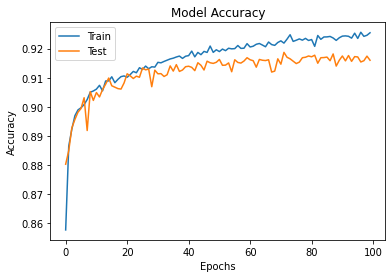

In [26]:
import matplotlib.pyplot as plt
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Accuracy-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

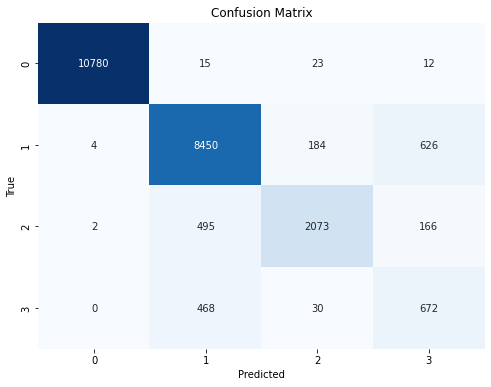

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pr)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

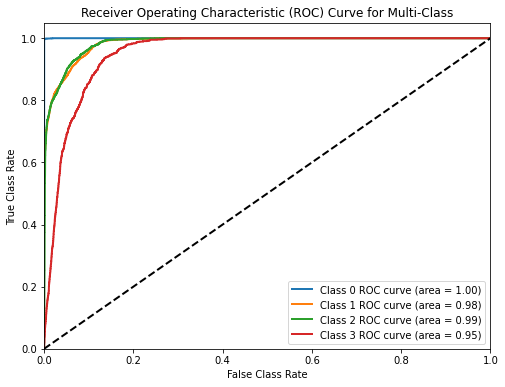

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Class Rate')
plt.ylabel('True Class Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()